# Welcome to Alice's Restaurant!


In [1]:
# Example data
from pydataset import data

# Python Imports
from math import sqrt

# Data Processing
import pandas as pd
import numpy as np

# Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats for hypothesis testing
from scipy import stats

# sklearn preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.metrics import classification_report

# model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [2]:
def split(df, stratify_by=None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.3, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(df, test_size=.3, random_state=123, stratify=train[stratify_by])
    
    return train, validate, test

In [3]:
# Data Acquisition
df = data("tips")

In [4]:
# Prep
df["bill_per_capita"] = df.total_bill / df["size"]
df["tip_per_capita"] = df.tip / df["size"]
df["table_size"] = df["size"]

df.head()

,total_bill,tip,sex,smoker,day,time,size,bill_per_capita,tip_per_capita,table_size
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,0.505000,2
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,0.553333,3
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1.166667,3
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000,1.655000,2
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500,0.902500,4


## Preparing Features

###  Features in this dataframe that are binary
- gender
- smoker
- day is either Lunch or Dinner

### Discrete Features 
- day is Thur, Fri, Sat, Sun

### Ordinal Features
- Table Size

### Continuous Features
- total_bill
- tip
- table_size

In [5]:
df["is_female"] = df.sex == "Female"
df["is_smoker"] = df.smoker == "Yes"
df["is_lunch"] = df.time == "Lunch"

In [6]:
df = df[['total_bill', 'tip', 'day', 'table_size',
       'bill_per_capita', 'tip_per_capita', 'is_female', 'is_smoker',
       'is_lunch']]
df.head()

,total_bill,tip,day,table_size,bill_per_capita,tip_per_capita,is_female,is_smoker,is_lunch
1,16.99,1.01,Sun,2,8.495000,0.505000,True,False,False
2,10.34,1.66,Sun,3,3.446667,0.553333,False,False,False
3,21.01,3.50,Sun,3,7.003333,1.166667,False,False,False
4,23.68,3.31,Sun,2,11.840000,1.655000,False,False,False
5,24.59,3.61,Sun,4,6.147500,0.902500,True,False,False


In [9]:
# Need to encode the day of the week feature more carefully, since there are multiple values
dummy_df = pd.get_dummies(df[["day"]])

# append dummy df cols to the original df. 
df = pd.concat([df, dummy_df], axis=1)
df.head()

,total_bill,tip,day,table_size,bill_per_capita,tip_per_capita,is_female,is_smoker,is_lunch,day_Fri,day_Sat,day_Sun,day_Thur
1,16.99,1.01,Sun,2,8.495000,0.505000,True,False,False,0,0,1,0
2,10.34,1.66,Sun,3,3.446667,0.553333,False,False,False,0,0,1,0
3,21.01,3.50,Sun,3,7.003333,1.166667,False,False,False,0,0,1,0
4,23.68,3.31,Sun,2,11.840000,1.655000,False,False,False,0,0,1,0
5,24.59,3.61,Sun,4,6.147500,0.902500,True,False,False,0,0,1,0


In [ ]:
df = df.drop(columns=["day"])

In [12]:
df.head()

,total_bill,tip,table_size,bill_per_capita,tip_per_capita,is_female,is_smoker,is_lunch,day_Fri,day_Sat,day_Sun,day_Thur
1,16.99,1.01,2,8.495000,0.505000,True,False,False,0,0,1,0
2,10.34,1.66,3,3.446667,0.553333,False,False,False,0,0,1,0
3,21.01,3.50,3,7.003333,1.166667,False,False,False,0,0,1,0
4,23.68,3.31,2,11.840000,1.655000,False,False,False,0,0,1,0
5,24.59,3.61,4,6.147500,0.902500,True,False,False,0,0,1,0


In [13]:
train, validate, test = split(df)

In [14]:
# Try and predict if a table will be a smoking table
# Binary classification
y = train.is_smoker

2    113
3     26
4     23
5      3
1      3
6      2
Name: table_size, dtype: int64

<AxesSubplot:xlabel='bill_per_capita', ylabel='tip_per_capita'>

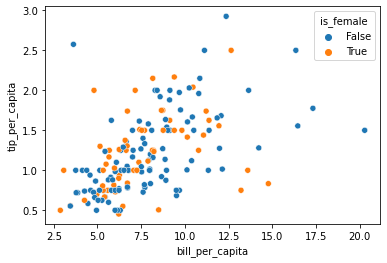

In [17]:
sns.scatterplot(x="bill_per_capita", y="tip_per_capita", data=train, hue="is_female")